In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train.shape,test.shape

((614, 13), (367, 12))

In [4]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

(None, None)

In [5]:
train.isnull().sum(),test.isnull().sum()

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
train_original.columns,test_original.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [8]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [9]:
train_original['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)  # to have value in proportion instead of number

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

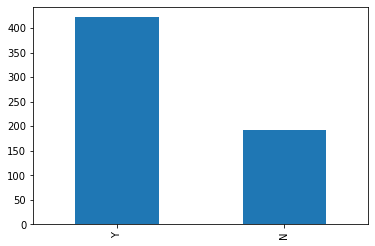

In [11]:
train['Loan_Status'].value_counts().plot.bar()

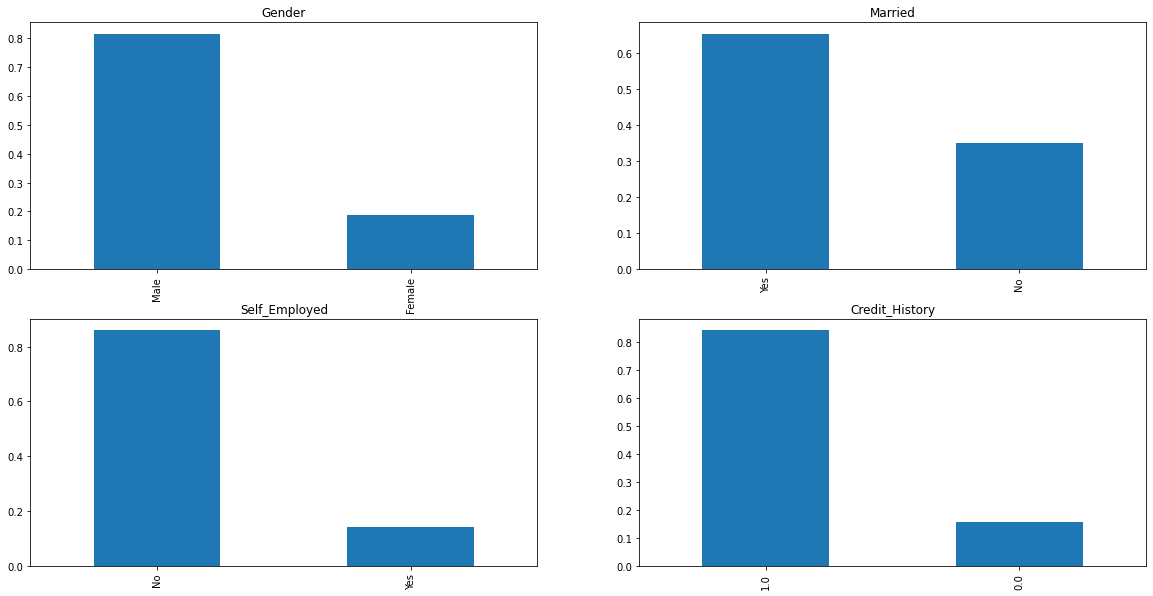

In [12]:
plt.figure(1),
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

    1) 80% of the applicant are male
    2) Around 65% of the applicant are married
    3) Around 15% of the applicant are self-employed
    4) Around 80% of the applicant have paid there debt.

In [13]:
# Ordinal Independent varibale

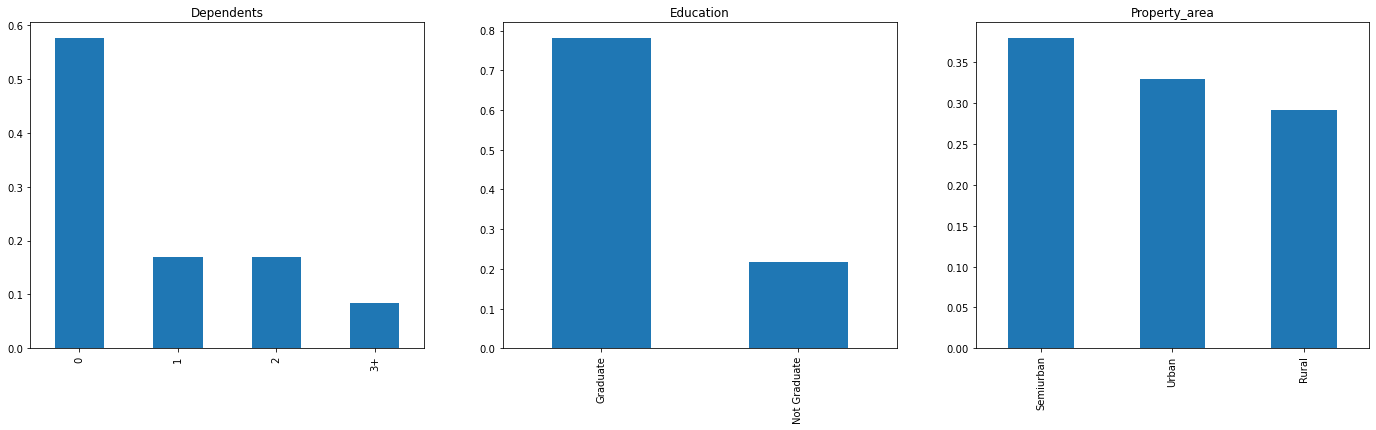

In [14]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_area')
plt.show()

    1) Around 58% of the applicant are independent
    2) Around 80% of the applicant are graduate
    3) Around 38% of the applicant are semiurban

In [15]:
# numerical Independent Variable

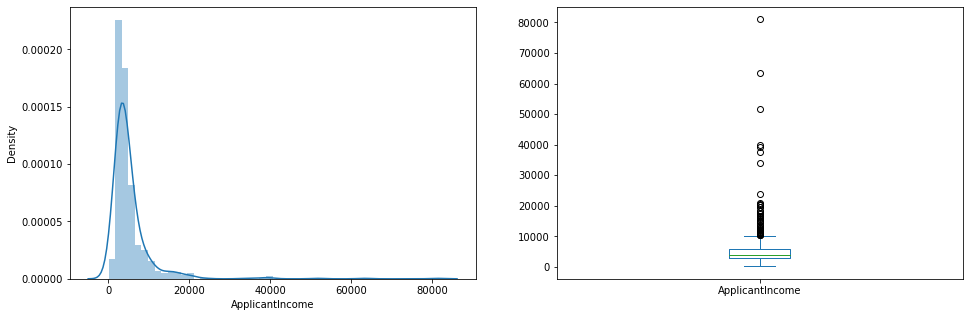

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

    1) Income of applicants are not normally distributed most of the distribution is towards left. we have to make it normal by applying some of algorithms in further.
    2) Most of the income are outliers. 

Text(0.5, 0.98, '')

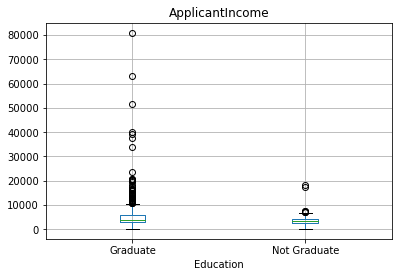

In [17]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')


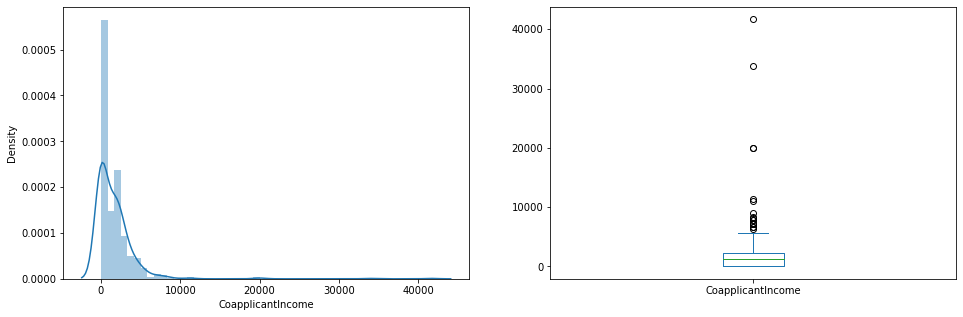

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

    1) We see similar distribution as that of the applicant income. Majority of the applicant has income range 0 to 5000. Also
    it has lot of outliers and not normally distributed.

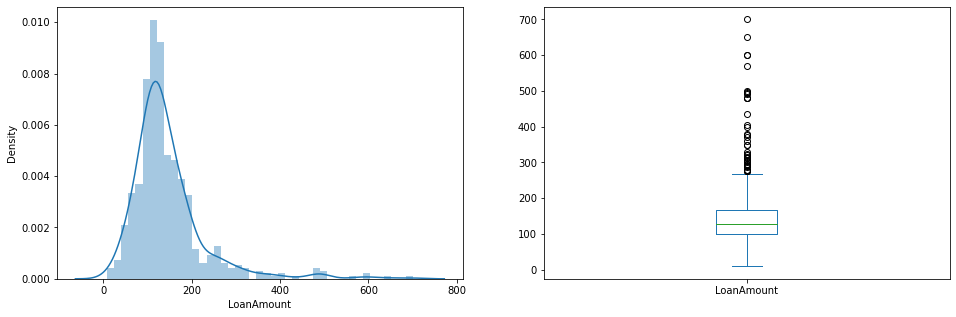

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

      1) We see a fairy normaly distributuion of loan amount and further we will treat outleir by algorithms

## Bivariate Analysis

In [20]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.head()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

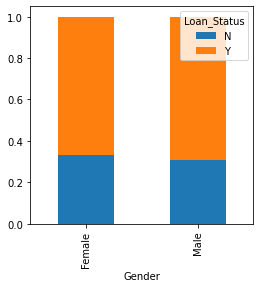

In [21]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

     1) More or less both male and female has same number of loan status.

In [22]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])


In [23]:
Married.head(),Dependents.head(),Education.head(),Self_Employed.head(),Credit_History.head(),Property_Area.head()

(Loan_Status    N    Y
 Married              
 No            79  134
 Yes          113  285,
 Loan_Status    N    Y
 Dependents           
 0            107  238
 1             36   66
 2             25   76
 3+            18   33,
 Loan_Status     N    Y
 Education             
 Graduate      140  340
 Not Graduate   52   82,
 Loan_Status      N    Y
 Self_Employed          
 No             157  343
 Yes             26   56,
 Loan_Status      N    Y
 Credit_History         
 0.0             82    7
 1.0             97  378,
 Loan_Status     N    Y
 Property_Area         
 Rural          69  110
 Semiurban      54  179
 Urban          69  133)

<AxesSubplot:xlabel='Property_Area'>

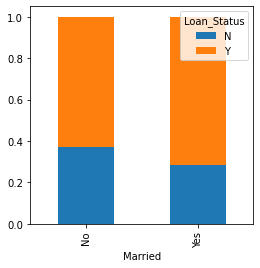

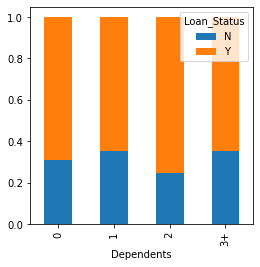

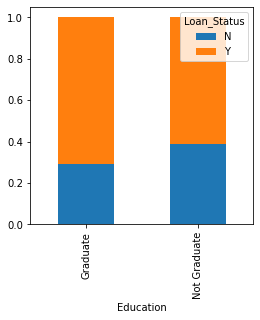

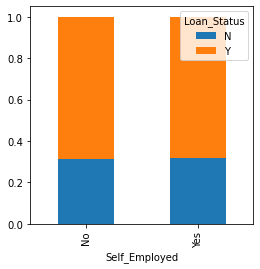

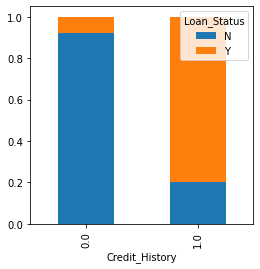

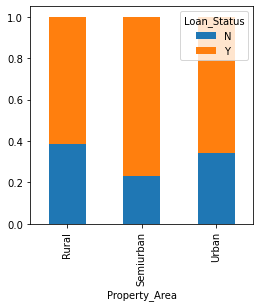

In [24]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

     1) Applicant of married people are higher for lean approval
     2) Distribution of applicants 1 or 3+ dependents is similar across both the categories  of loan status
     3) Graduate applicant has higher rate of loan approval
     4) There is not much insight from self-employed applicant w.r.t loan approval
     5) Applicant with credit history 1 has very much higher chances of loan approval
     6) Applicant from semi urban have higher loan approval rate than rural and urban
    

<AxesSubplot:xlabel='Loan_Status'>

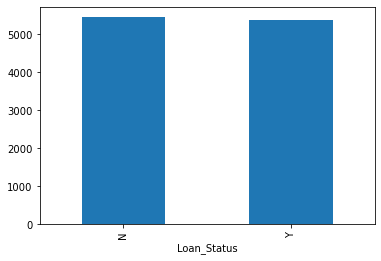

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

     1) There is not much difference with both catgeory of applicant income 
     
     2) Lets try with range in salary by creating bins

In [26]:
bins = [0,2500,4000,6000,80000]
group = ['low','average','High','Very High']
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [27]:
Income_bin = pd.crosstab(train['Income_Bin'],train['Loan_Status'])

In [28]:
Income_bin.head()

Loan_Status,N,Y
Income_Bin,,
low,34,74
average,67,159
High,45,98
Very High,45,91


Text(0, 0.5, 'percentage')

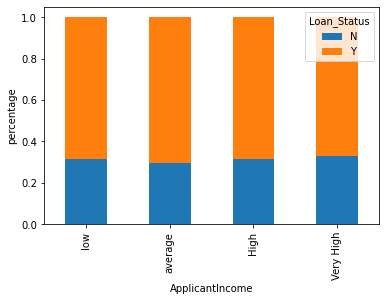

In [29]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('percentage')

In [30]:
bins = [0,1000,3000,5000]
group =['low','Average','High']
train['Coapplicant_income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

In [31]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,Coapplicant_income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


In [32]:
Coapplicant_income_bin = pd.crosstab(train['Coapplicant_income_bin'],train['Loan_Status'])

In [33]:
Coapplicant_income_bin.head()

Loan_Status,N,Y
Coapplicant_income_bin,,
low,3,19
Average,61,161
High,21,46


Text(0, 0.5, 'percentage')

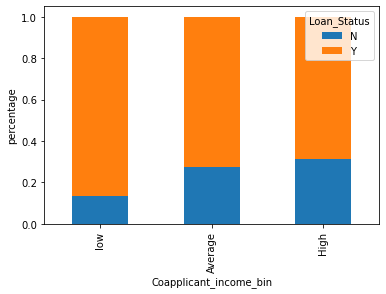

In [34]:
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant_income_bin')
plt.ylabel('percentage')

    1) This show us that applicant having low coapplicant income has high chance of having loan approval. But this analyses
      is not fitting the whole story because this is low category also have those applicant where people has 0 coapplicant 
        income
    2) Now we will combine the applicant income and coapplicant income and see the any fluctation we find.

In [35]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [36]:
train[['ApplicantIncome','CoapplicantIncome','total_income']].head()

,ApplicantIncome,CoapplicantIncome,total_income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0


In [37]:
bins = [0,2500,4000,6000,8000]
group =['low','average','high','very high']
train['total_income_bin']=pd.cut(train['total_income'],bins,labels=group)

In [38]:
total_income_bin = pd.crosstab(train['total_income_bin'],train['Loan_Status'])
total_income_bin.head()

Loan_Status,N,Y
total_income_bin,,
low,14,10
average,32,87
high,65,159
very high,39,76


Text(0, 0.5, 'percentage')

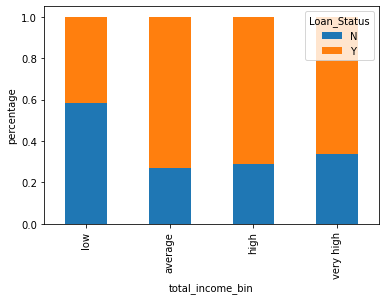

In [39]:
total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('total_income_bin')
plt.ylabel('percentage')

In [40]:
bins = [0,100,200,700]
group=['low','average','high']
train['loan_amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

In [41]:
LoanAmount = pd.crosstab(train['loan_amount_bin'],train['Loan_Status'])

In [42]:
LoanAmount.head()

Loan_Status,N,Y
loan_amount_bin,,
low,47,107
average,103,255
high,31,49


Text(0, 0.5, 'Percentage')

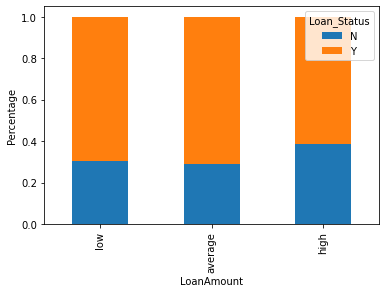

In [43]:
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

      1) It can be seen having low and average loan amount are likely had loan approved hence it supports our hyposthesis 
       in which we considered that the chances of loan approval will be high if we loan amount is less.

In [44]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'Coapplicant_income_bin', 'total_income',
       'total_income_bin', 'loan_amount_bin'],
      dtype='object')

In [45]:
train = train.drop(['Income_Bin', 'Coapplicant_income_bin', 'total_income','total_income_bin', 'loan_amount_bin'],axis=1)

In [46]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [48]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

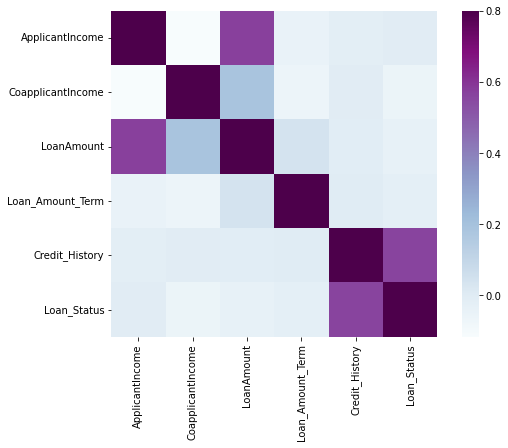

In [49]:
matrix =train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

     In the heat map (LoanAmount-ApplicantIncome),(coApplicantIncome-LoanAmount),(Loan_Status-Credit_History) are highly              correlated

# Treating Missing value 

In [50]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

     We have found missing values in Gender, Married, Dependents, Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History

In [51]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [52]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [53]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [54]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [55]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

    Hence all missing values are treated successfully as categorical fetures are treated with mode and numerical fetures
    are treated with median. 

     Now lets treat missing values in test data with same approach

In [56]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

In [57]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [58]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

     Due to bulk of data in the loan amount is at the left and the right tail is longer. this is called right skewness. 
    to remove skewness there is way called log transformation to restore the larger value and make it to normal 
    distribution

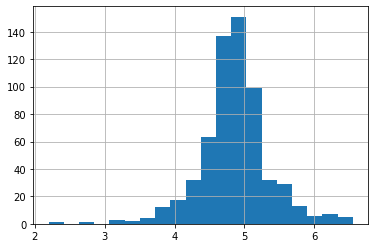

In [59]:
train['Loan_Amount_log']= np.log(train['LoanAmount']) # transforming train dataset into log form
train['Loan_Amount_log'].hist(bins=20)   # histograph for loan amount in train dataset
test['Loan_Amount_log']=np.log(test['LoanAmount']) # transforming test dataset into log form

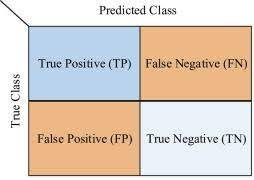

      Evaluation metrix in classification model.
     1) Accuracy ---> a) True Positive -- Acutal values are true and predicted values are true
                       b) False Negative -- Actual Values are true but predicted values are false
                       c) False Positive -- Acutal values are false but predicted values are true
                       d) True Negative -- Acutal values are false and predicted values are false
                       
        Accuracy = True Positve + True Negative / TP+FP+FN+TN
        
     2) Precision --- observation which  true are also actual labeled as true. 
         Precision = True Positve/True positve + False Postive 
     
    3) Recall(Sensitivity) -- how many observation of true class are labelled correctly 
        recall = True Positive / True Positive + False Negative
     4) Specificity -- how many observation of false class are labbeled correctly
           specificity - True Negative/ True Negative + False Postive
           
      
      


      Lets drop the loan_id feature as it has no affect on the loan status. Droping tthe loan_id in test data also.

In [60]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [61]:
x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status 

In [62]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [63]:
x = pd.get_dummies(x)


In [64]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [65]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3,random_state=45)

In [68]:
x_train.shape,x_cv.shape,y_train.shape,y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [69]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score as a_s

In [70]:
model=lr()
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
lr(multi_class = 'ovr',n_jobs=1,random_state=40,solver='liblinear')

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=40,
                   solver='liblinear')

In [72]:
pred_cv = model.predict(x_cv)

In [73]:
a_s(y_cv,pred_cv)

0.7783783783783784

         so our accuracy score is 0.77 approximately 78% of the loan_status are identified correctly

In [74]:
test.shape

(367, 21)

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [85]:
model=lr()
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
lr(multi_class = 'ovr',n_jobs=1,random_state=40,solver='liblinear')

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=40,
                   solver='liblinear')

In [87]:
pred_test = model.predict(x_test)

In [88]:
a_s(y_test,pred_test)

0.7723577235772358

    With the ratio 80:20 train-test data We got the acccuracy score of 77% which is quite acceptable to make a model. 

## Now we will apply some other algorithms to so that I can imporve the accuracy score of the train and predicted values

### Cross Validation

   Lets import stratified kfold from sklearn and fit the model

In [124]:
from sklearn.model_selection import StratifiedKFold

In [97]:
i =1
kf = StratifiedKFold(n_splits=5,random_state=54,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model = lr(random_state=22)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = a_s(yvl,pred_test)
    print('accuracy_score',score)
    i=i+1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.819672131147541


In [98]:
print('Mean Validation accuracy score for this model is ', score.mean())

Mean Validation accuracy score for this model is  0.819672131147541


In [99]:
from sklearn import metrics 

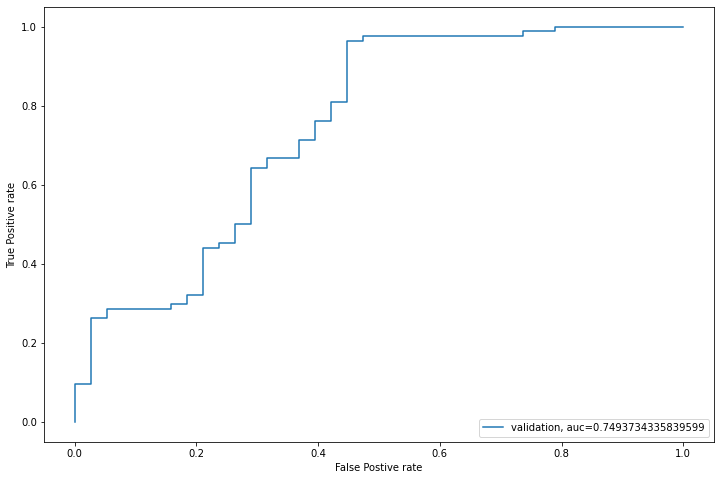

In [100]:
fpr,tpr,_ =metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Postive rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)
plt.show()

## Doing Some feature engineering here i.e now i'm adding some new columns here in the data set that might affect the target variables

             adding new columns total_income, EMI(ratio of loan amount w.r.t to loan amount term), and          balance_income(income_left after paying emi)

In [103]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income']=test['ApplicantIncome']+test['CoapplicantIncome']


<AxesSubplot:xlabel='Total_income', ylabel='Density'>

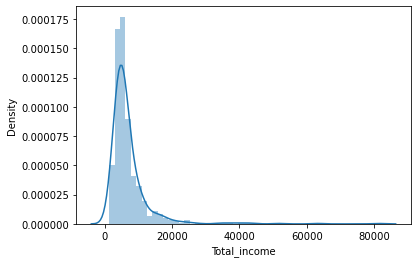

In [106]:
sns.distplot(train['Total_income'])

        Distribution is shifted towards left i.e the distribution is right skewed. 
        taking log transformation to make it normal distribution

In [107]:
train['total_income_log']=np.log(train['Total_income'])

<AxesSubplot:xlabel='total_income_log', ylabel='Density'>

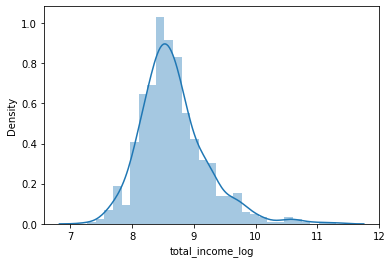

In [108]:
sns.distplot(train['total_income_log'])

In [109]:
test['total_income_log']=np.log(test['Total_income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

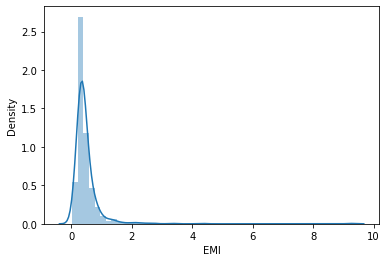

In [112]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])


In [113]:
train['Balance_income']=train['Total_income']-(train['EMI']*1000)
test['Balance_income']=test['Total_income']-(test['EMI']*1000)

<AxesSubplot:xlabel='Balance_income', ylabel='Density'>

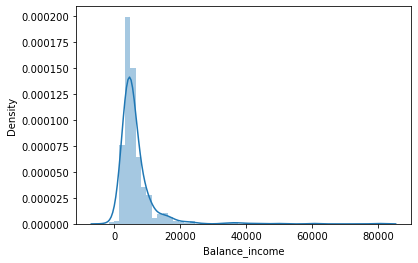

In [114]:
sns.distplot(train['Balance_income'])

   Droping the old features as correlation between new features and old features will be very high. 
    also it will help me in reducing noise too.

In [115]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [117]:
train.head()

,Credit_History,Loan_Status,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income,total_income_log,EMI,Balance_income
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


     We will build the following models in this session:
        * Logistic regression
        * Decision Tress
        * Random Forest
        * XGBoost

## Logistic Regression

In [118]:
x = train.drop('Loan_Status',axis=1)

In [119]:
x.head()

,Credit_History,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_income,total_income_log,EMI,Balance_income
0,1.0,4.852030,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,0,1,0,1,0,1,0,0,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [122]:
y = train.Loan_Status

In [123]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [192]:
i=1
kf =StratifiedKFold(n_splits=5,random_state=45,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = lr(random_state=45)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score_1 = a_s(yvl,pred_test)
    print('accuracy_score',score_1)
    i = i+1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    


1 of kfold5
accuracy_score 0.6829268292682927

2 of kfold5
accuracy_score 0.7804878048780488

3 of kfold5
accuracy_score 0.6991869918699187

4 of kfold5
accuracy_score 0.6747967479674797

5 of kfold5
accuracy_score 0.8360655737704918


In [193]:
print('The mean validation accuracy for this model is ',score_1.mean())

The mean validation accuracy for this model is  0.8360655737704918


In [194]:
score_0 = score_1.mean()
score_0

0.8360655737704918

## Decision Tree

In [139]:
from sklearn import tree

In [196]:
i=1
kf =StratifiedKFold(n_splits=5,random_state=45,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model=tree.DecisionTreeClassifier(random_state=45)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score_2 = a_s(yvl,pred_test)
    print('accuracy score',score_2)
    i = i+1
    pred_test = model.predict(test)


1 of kfold5
accuracy score 0.6747967479674797

2 of kfold5
accuracy score 0.7560975609756098

3 of kfold5
accuracy score 0.7235772357723578

4 of kfold5
accuracy score 0.6666666666666666

5 of kfold5
accuracy score 0.7131147540983607


In [197]:
print('The mean validation score is ',score_2.mean())

The mean validation score is  0.7131147540983607


In [198]:
score_1 = score_2.mean()
score_1

0.7131147540983607

## Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier as r_f

In [199]:
i=1
kf =StratifiedKFold(n_splits=5,random_state=45,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = r_f(random_state=45,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score_3 = a_s(yvl,pred_test)
    print('accuracy score',score_3)
    i=i+1
    pred_test = model.predict(test)


1 of kfold5
accuracy score 0.7317073170731707

2 of kfold5
accuracy score 0.8536585365853658

3 of kfold5
accuracy score 0.8292682926829268

4 of kfold5
accuracy score 0.7560975609756098

5 of kfold5
accuracy score 0.819672131147541


In [200]:
print('The mean validation score is ',score_3.mean())

The mean validation score is  0.819672131147541


In [202]:
score_2 = score_3.mean()
score_2

0.819672131147541

## Grid-Search

In [150]:
from sklearn.model_selection import GridSearchCV as g_s

In [151]:
paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [156]:
grid_search = g_s(r_f(random_state=45),paramgrid)

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.2,random_state=45)

In [160]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=45),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [162]:
g_s(error_score='raise',estimator=r_f(random_state=45,n_jobs=1),n_jobs=1,param_grid=paramgrid,return_train_score='warn')

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_jobs=1, random_state=45),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [168]:
grid_search.best_estimator_
r_f(n_estimators=41,max_depth=3,random_state=45,n_jobs=1)

RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=45)

In [170]:
i=1
kf =StratifiedKFold(n_splits=5,random_state=45,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model=r_f(n_estimators=41,max_depth=3,random_state=45)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = a_s(yvl,pred_test) 
    print('accuracy score',score)
    i = i+1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]
    


1 of kfold5
accuracy score 0.7398373983739838

2 of kfold5
accuracy score 0.8373983739837398

3 of kfold5
accuracy score 0.8536585365853658

4 of kfold5
accuracy score 0.7723577235772358

5 of kfold5
accuracy score 0.8278688524590164


In [172]:
print('Mean accuracy score is ',score.mean())

Mean accuracy score is  0.8278688524590164


<AxesSubplot:>

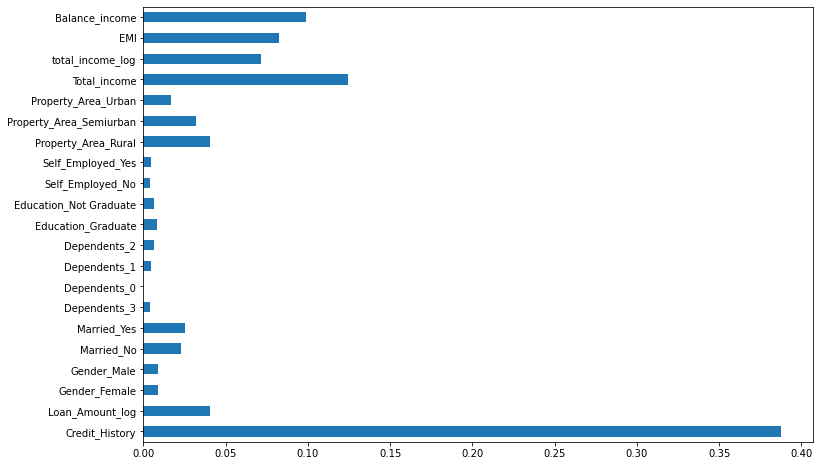

In [173]:
importance=pd.Series(model.feature_importances_,index=x.columns)
importance.plot(kind='barh',figsize=(12,8))

## XGBOOST

In [181]:
! python -m pip install xgboost

In [183]:
from xgboost import XGBClassifier as xg

In [203]:
i=1
kf =StratifiedKFold(n_splits=5,random_state=45,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = xg(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score_4 = a_s(yvl,pred_test)
    print('accuracy score',score_4)
    i = i+1
    pred_test = model.predict(test)
    pred3 = model.predict_proba(test)[:,1]


1 of kfold5
accuracy score 0.6991869918699187

2 of kfold5
accuracy score 0.8130081300813008

3 of kfold5
accuracy score 0.7804878048780488

4 of kfold5
accuracy score 0.7398373983739838

5 of kfold5
accuracy score 0.7377049180327869


In [204]:
print('Mean validation score is ',score_4.mean())

Mean validation score is  0.7377049180327869


In [205]:
score_3 = score_4.mean()

In [206]:
score_3

0.7377049180327869

In [221]:
score_all = [score_0,score_1,score_2,score_3]

In [222]:
score_all

[0.8360655737704918, 0.7131147540983607, 0.819672131147541, 0.7377049180327869]

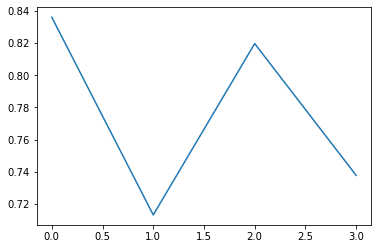

In [225]:
plt.plot(score_all)

    After trying and testing 4 algorithms the best accuracy is achieved by logistic regression (0.83) and decision tree (0.81)
    